In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Data Preprocessing

### Training Image Preprocessing

In [48]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [49]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


### Building Model

In [50]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [51]:
# Initial Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Additional Convolutional Layers
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding more layers for deeper feature extraction
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())

# Increase number of neurons in the dense layer
cnn.add(tf.keras.layers.Dense(units=2048, activation='relu'))  # Increased from 1500 to 2048
cnn.add(tf.keras.layers.Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))


In [52]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Using 0.0001 as suggested
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [53]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          77,862 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,986,438 (34.28 MB)

 Trainable params: 8,986,438 (34.28 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2301s 1s/step - accuracy: 0.4067 - loss: 2.0873 - val_accuracy: 0.8206 - val_loss: 0.5588
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2293s 1s/step - accuracy: 0.8452 - loss: 0.4881 - val_accuracy: 0.8980 - val_loss: 0.3150
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2296s 1s/step - accuracy: 0.9071 - loss: 0.2904 - val_accuracy: 0.9050 - val_loss: 0.2934
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2298s 1s/step - accuracy: 0.9358 - loss: 0.1971 - val_accuracy: 0.9304 - val_loss: 0.2179
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2311s 1s/step - accuracy: 0.9510 - loss: 0.1456 - val_accuracy: 0.9512 - val_loss: 0.1528
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2260s 1s/step - accuracy: 0.9600 - loss: 0.1206 - val_accuracy: 0.9553 - val_loss: 0.1485
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2200s 1s/step - accuracy: 0.9703 - loss: 0.0919 - val_accuracy: 0.9377 - val_loss: 0.1989
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2198s 1s/step - accuracy: 0.9729 -

## Model Evaluation

In [55]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 932s 424ms/step - accuracy: 0.9744 - loss: 0.0807
Training accuracy: 0.9758731126785278


In [56]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 214s 389ms/step - accuracy: 0.9503 - loss: 0.1968
Validation accuracy: 0.9470748901367188


In [57]:
cnn.save('trained_plant_disease_model.keras')

In [58]:
training_history.history #Return Dictionary of history

{'accuracy': [0.612532913684845,
  0.8651824593544006,
  0.9153425097465515,
  0.9399388432502747,
  0.9558574557304382,
  0.9638665914535522,
  0.9708371758460999,
  0.9745785593986511,
  0.9786897897720337,
  0.9813926815986633],
 'loss': [1.3019068241119385,
  0.4214556813240051,
  0.2625543177127838,
  0.18365760147571564,
  0.13335222005844116,
  0.10959359258413315,
  0.08958666771650314,
  0.07944056391716003,
  0.06531200557947159,
  0.05652560293674469],
 'val_accuracy': [0.8206236958503723,
  0.8979626893997192,
  0.904962420463562,
  0.9304006099700928,
  0.9511722922325134,
  0.9553266763687134,
  0.937684953212738,
  0.9641475081443787,
  0.9572046399116516,
  0.9470748901367188],
 'val_loss': [0.5587695837020874,
  0.315011203289032,
  0.29344239830970764,
  0.21793332695960999,
  0.1527637392282486,
  0.14845791459083557,
  0.19887913763523102,
  0.11666397005319595,
  0.1491001397371292,
  0.2052493542432785]}

In [59]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [60]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

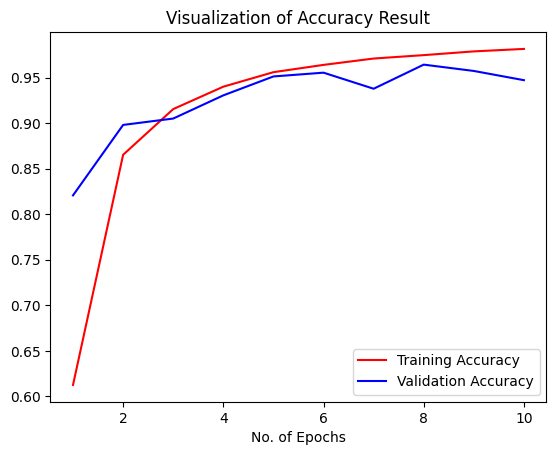

In [61]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [62]:
class_name = validation_set.class_names

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [64]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 574s 33ms/step


In [65]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [66]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [67]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [69]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [70]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.98      0.97       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.86      0.91       440
                                   Apple___healthy       0.97      0.96      0.96       502
                               Blueberry___healthy       0.96      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.94      0.96       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.88      0.89       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.96      0.

### Confusion Matrix Visualization

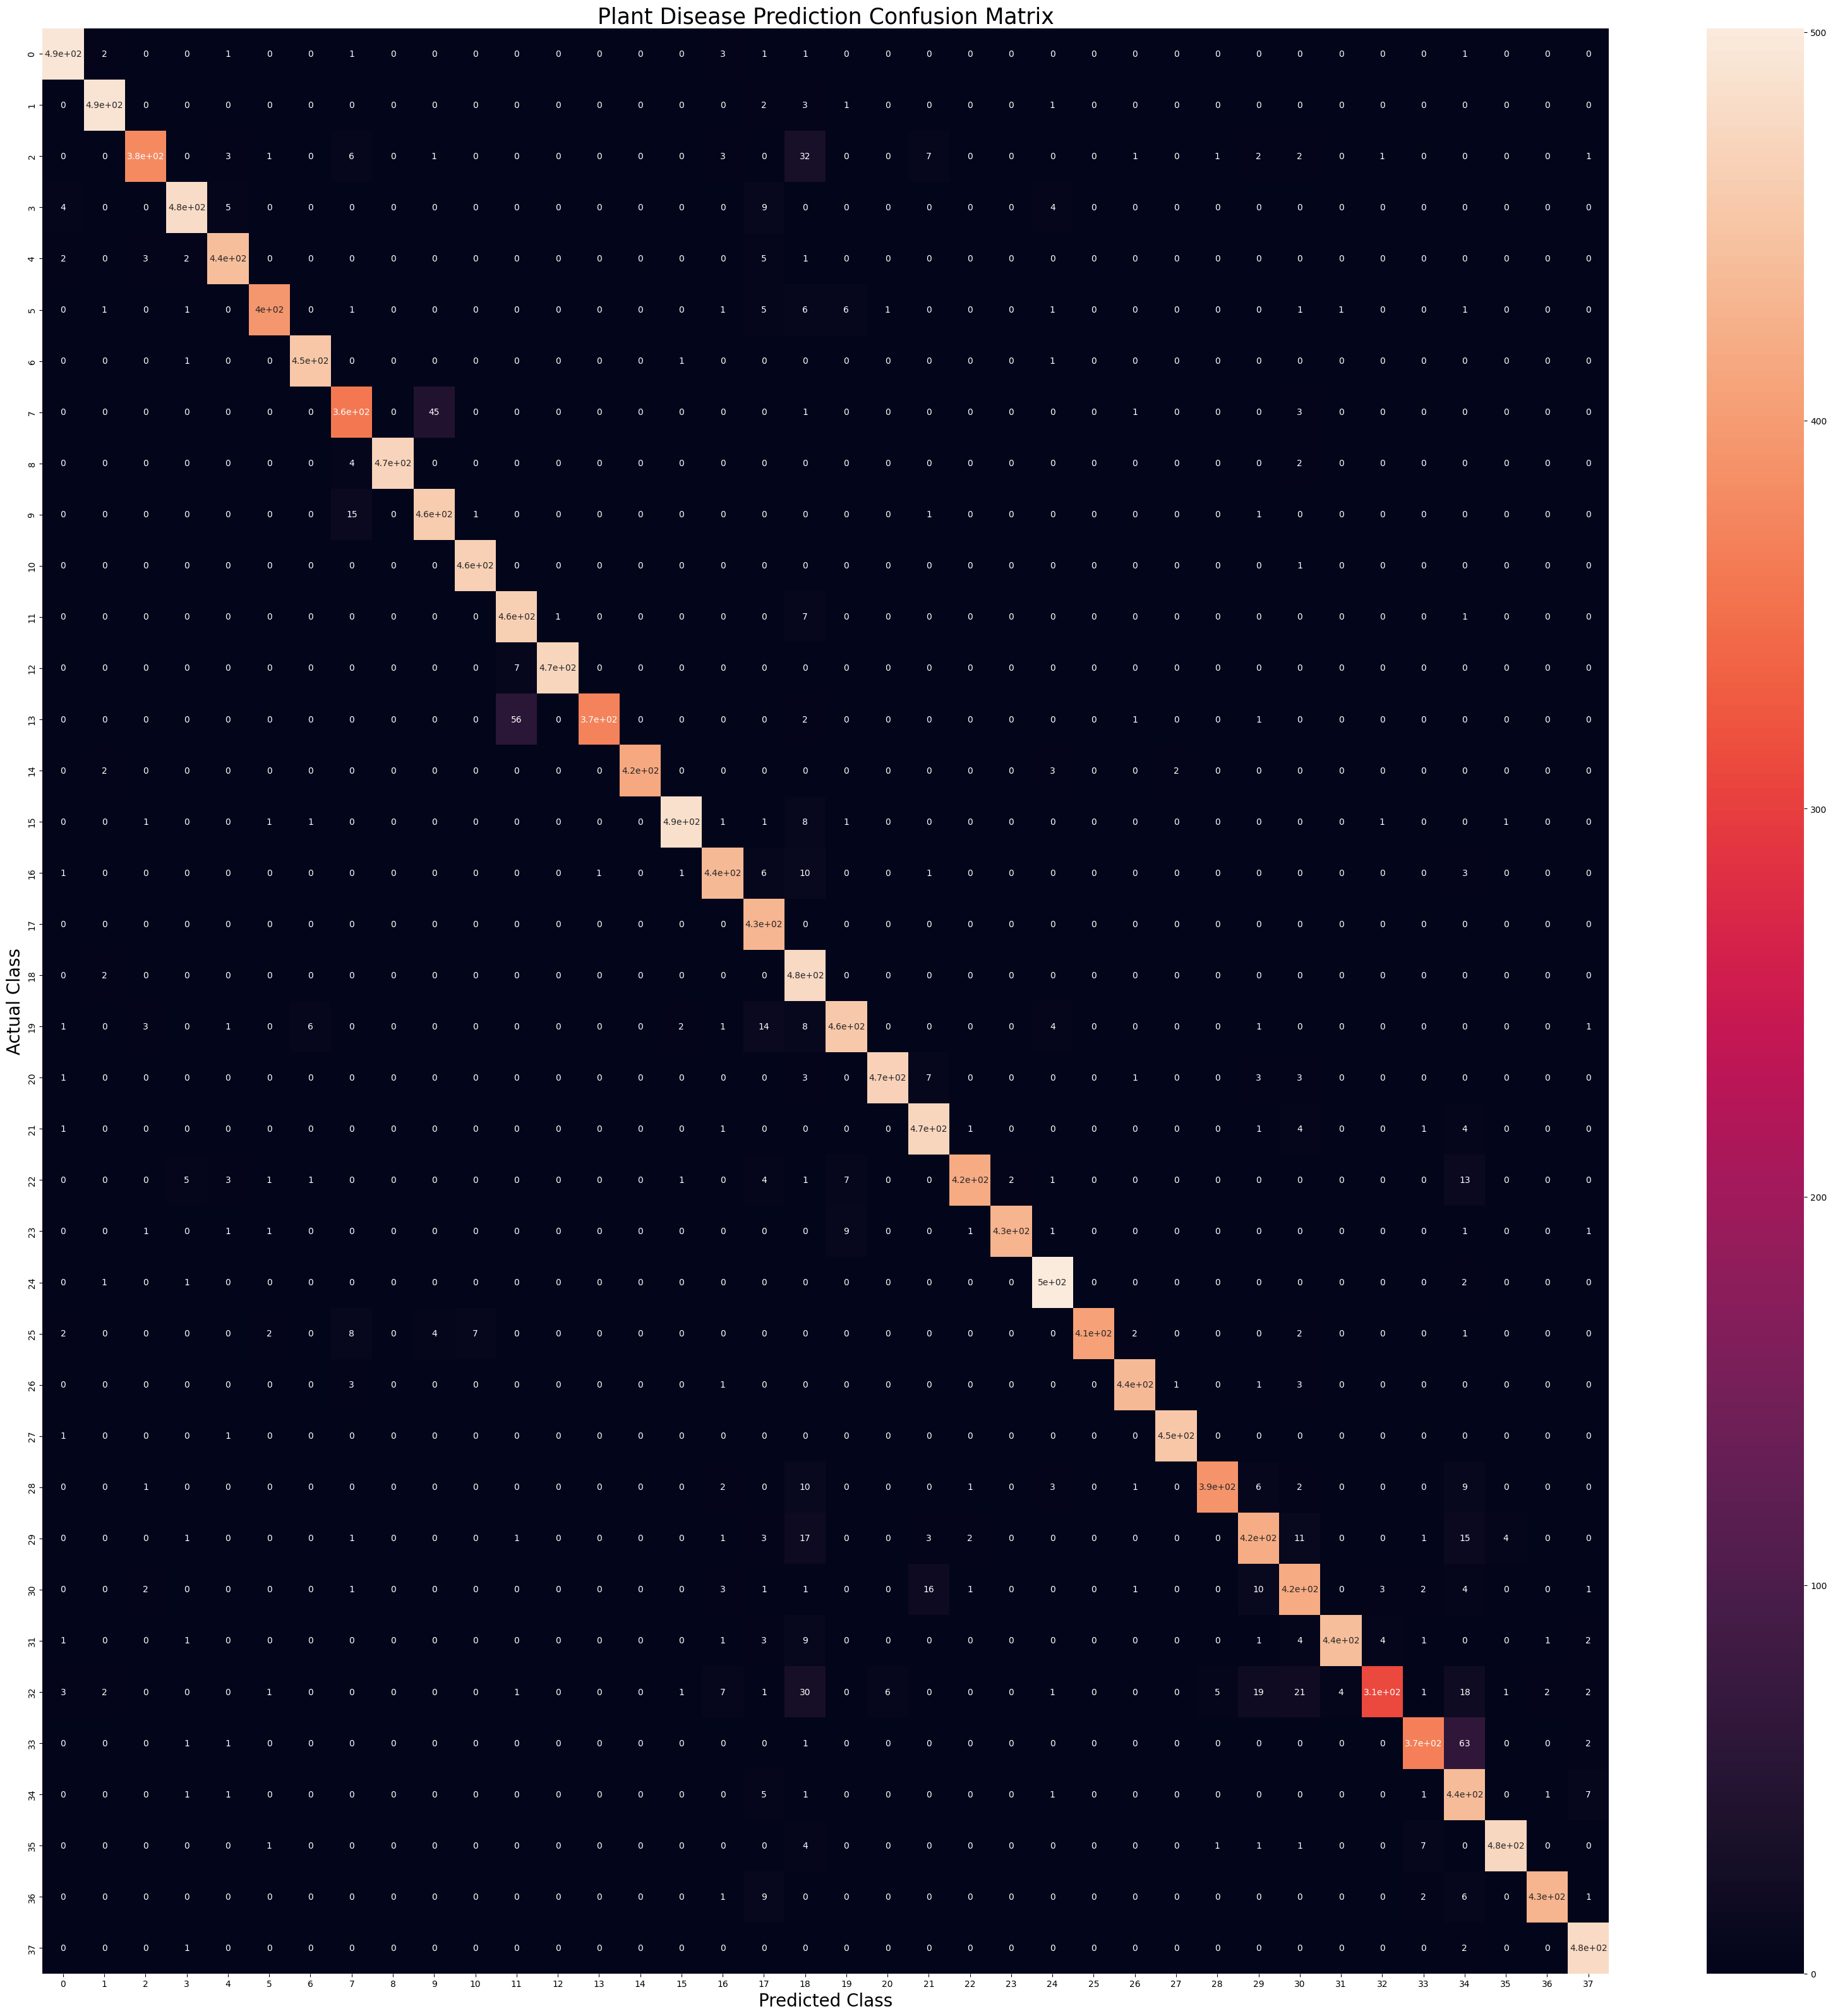

In [71]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()